## 📘 Solar Resource Data – Profiling, Cleaning & EDA Notebook

---

### 1. Import Libraries 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### 2. Load Dataset (Togo)

In [2]:
path = "../data/togo-dapaong_qc.csv"
df = pd.read_csv(path)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


### 3. Validate Timestamp & Data Types
#### Timestamp Parsing
Convert timestamp to datetime and check for issues.


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### 4. Summary Statistics & Missing-Value Report

In [4]:
# Summary
df.describe(include="all")

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [5]:
# Missing value count
missing = df.isna().sum()
missing


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
# Columns with >5% missing values
missing_5 = missing[missing > len(df) * 0.05]
missing_5


Comments    525600
dtype: int64

In [7]:
#An overview of the dataset: the last 5 rows
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [8]:
#An overview of the dataset: a random sample of 5 rows
df.sample(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
419173,2022-08-12 02:14:00,-1.2,0.0,0.0,0.0,0.0,23.2,96.8,0.0,0.0,0.0,0.0,0.0,976,0,0.0,23.2,22.9,NaN
291250,2022-05-15 06:11:00,56.9,3.5,53.1,47.0,46.7,26.4,68.5,3.3,4.1,0.6,211.1,19.0,976,0,0.0,27.5,27.6,NaN
363823,2022-07-04 15:44:00,66.7,2.6,57.6,64.4,63.9,31.0,57.4,2.4,3.6,0.6,196.8,18.0,976,0,0.0,33.2,33.6,NaN
145637,2022-02-03 03:18:00,-3.6,0.0,0.0,0.0,0.0,17.6,18.3,2.0,2.6,0.4,90.2,7.8,978,0,0.0,15.9,15.5,NaN
362568,2022-07-03 18:49:00,-2.4,0.0,0.0,0.0,0.0,28.0,72.9,1.7,2.1,0.4,223.1,14.3,977,0,0.0,27.5,27.1,NaN


In [9]:
#An overview of the dataset: the shape of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### 5. Outlier Detection & Basic Cleaning

### Outlier Detection (Z-score Method)
Check GHI, DNI, DHI, ModA, ModB, WS, WSgust.

In [10]:
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outliers = (z_scores > 3).sum()
outliers


np.int64(12550)

### Remove/Clean Outliers

In [11]:
df_clean = df.copy()

# Convert Timestamp
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"])
df_clean.sort_values("Timestamp", inplace=True)

# Replace negative irradiance values with zero
irradiance_cols = ["GHI", "DNI", "DHI", "ModA", "ModB"]
df_clean[irradiance_cols] = df_clean[irradiance_cols].clip(lower=0)

# Validate humidity and wind direction
df_clean["RH"] = df_clean["RH"].clip(0, 100)
df_clean["WD"] = df_clean["WD"].apply(lambda x: x % 360 if pd.notnull(x) else x)

# Fix Cleaning flag
df_clean["Cleaning"] = df_clean["Cleaning"].apply(lambda x: 1 if x == 1 else 0)

# Impute missing numeric values with median
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

# Optional: Remove high outliers using Z-score (>3σ)
outlier_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = np.abs(stats.zscore(df_clean[outlier_cols], nan_policy='omit'))

# Keep only rows where all Z-scores <= 3
df_clean = df_clean[(z_scores <= 3).all(axis=1)]


### Export Cleaned File

In [12]:
df_clean.to_csv("../data/togo_clean.csv", index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!


### 6. Time Series Plots

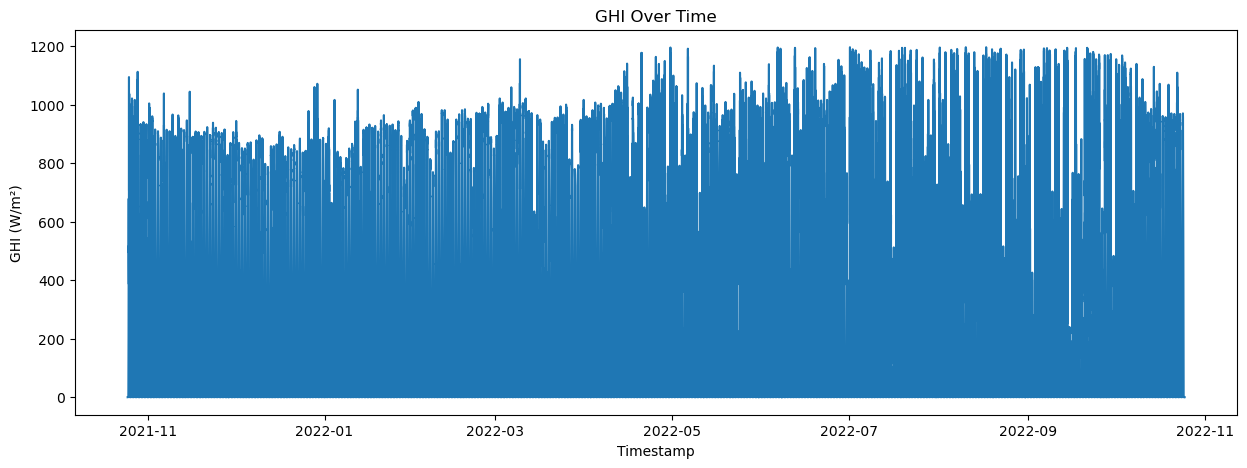

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'])
plt.title("GHI Over Time")
plt.xlabel("Timestamp")
plt.ylabel("GHI (W/m²)")
plt.show()


### 7. Cleaning Impact (ModA/ModB vs Cleaning Flag)

In [14]:
cleaning_effect = df_clean.groupby("Cleaning")[["ModA","ModB"]].mean()
cleaning_effect


,ModA,ModB
Cleaning,,
0,219.206624,212.851571
1,528.864835,527.268498


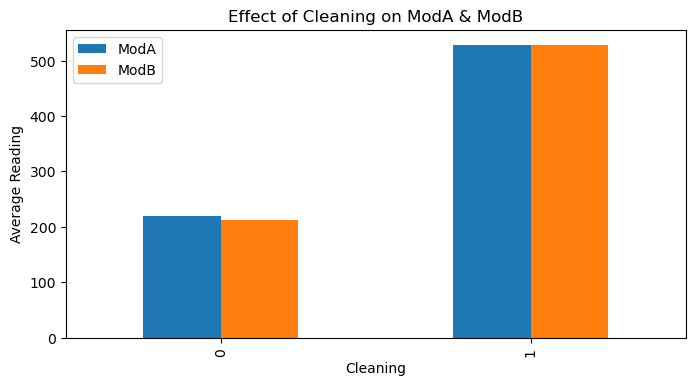

In [15]:
cleaning_effect.plot(kind="bar", figsize=(8,4), title="Effect of Cleaning on ModA & ModB")
plt.ylabel("Average Reading")
plt.show()


### 8. Correlation Heatmap

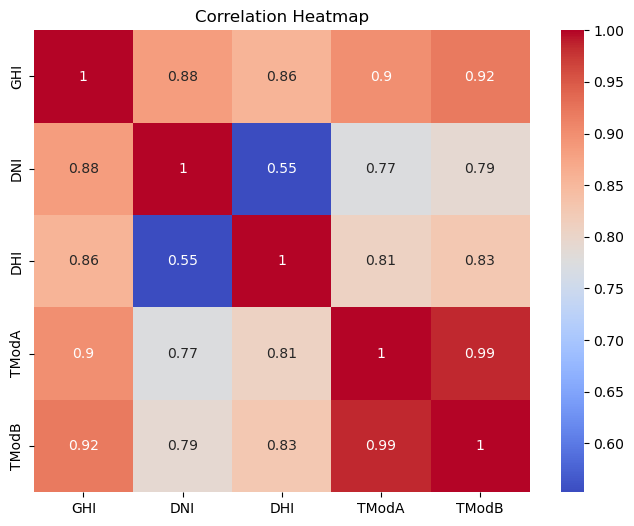

In [16]:
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Scatter Plots

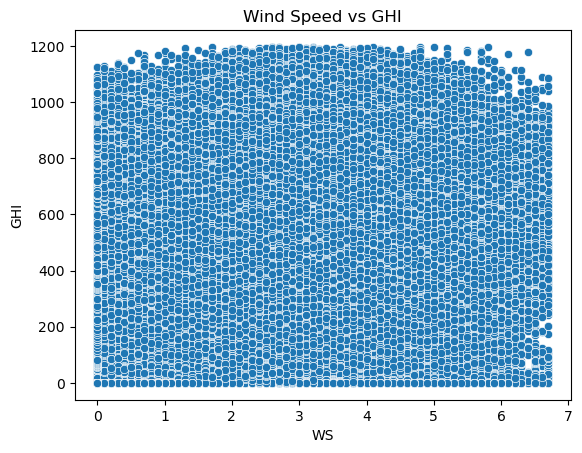

In [17]:
sns.scatterplot(data=df_clean, x="WS", y="GHI")
plt.title("Wind Speed vs GHI")
plt.show()


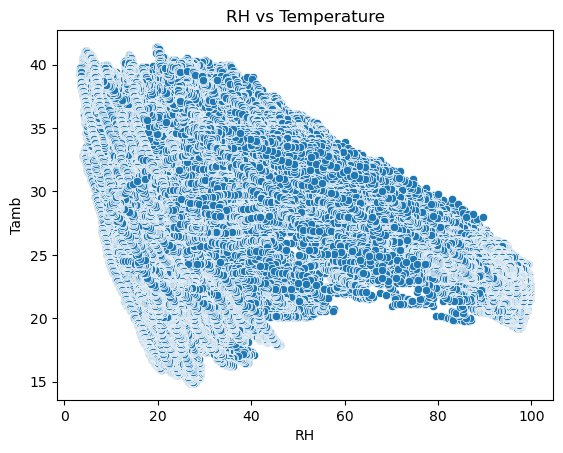

In [18]:
sns.scatterplot(data=df, x="RH", y="Tamb")
plt.title("RH vs Temperature")
plt.show()


### 9. Wind & Distribution Analysis

#### Wind Direction & Speed
Histogram and distribution.

Histogram for GHI

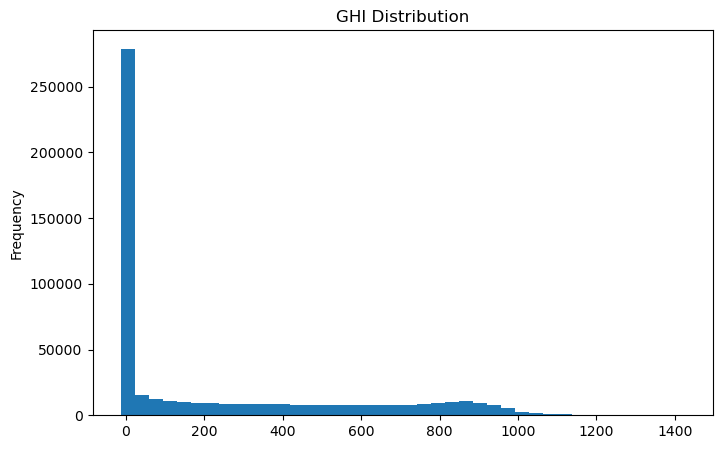

In [19]:
df["GHI"].plot(kind="hist", bins=40, figsize=(8,5), title="GHI Distribution")
plt.show()

Histogram for WS

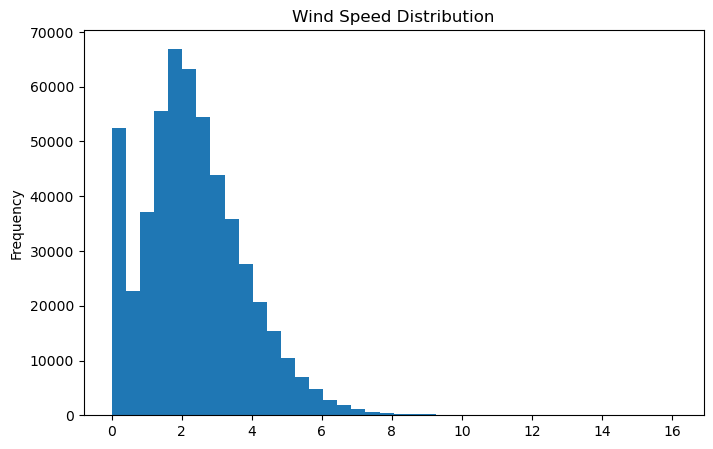

In [20]:
df["WS"].plot(kind="hist", bins=40, figsize=(8,5), title="Wind Speed Distribution")
plt.show()


### 10. Temperature Analysis

Relationship Between RH, Temperature, & Solar Radiation


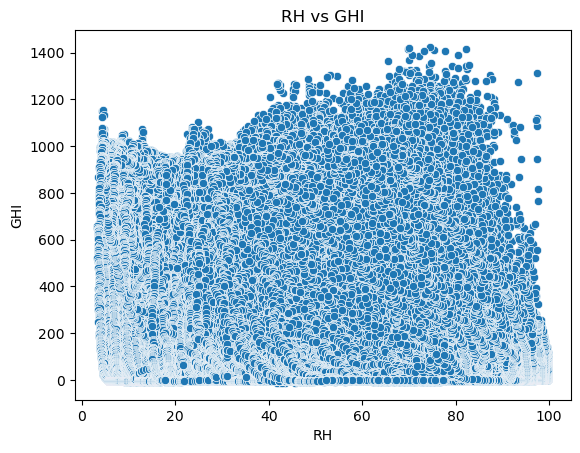

In [21]:
sns.scatterplot(data=df, x="RH", y="GHI")
plt.title("RH vs GHI")
plt.show()


### 11. Bubble Chart

Bubble Chart: GHI vs Temperature (Bubble Size = RH)


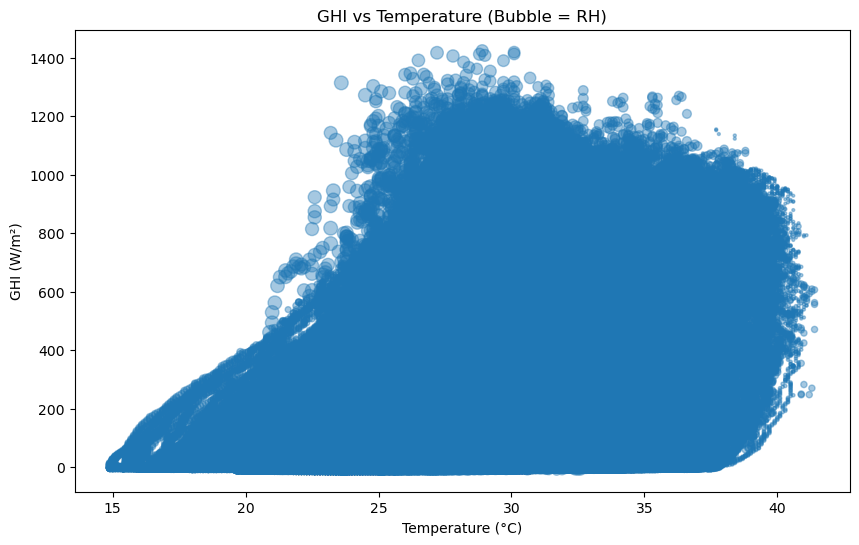

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df["Tamb"], df["GHI"], s=df["RH"], alpha=0.4)
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature (Bubble = RH)")
plt.show()


## References

### 🔗 References
- Z-Score Outlier Detection: https://www.statisticshowto.com/probability-and-statistics/z-score/
- Seaborn Visualization Docs: https://seaborn.pydata.org/
- Time Series EDA Guide: https://pandas.pydata.org/docs/
- Wind Rose Examples: https://matplotlib.org/stable/gallery/specialty_plots/windrose.html
